# Tarea:
- Comparar con la viga en voladizo de fenics
- Encontrar el error del doble empotramiento

# Con opensees también podemos verificar nuestros modelos de Fenics o Freefem

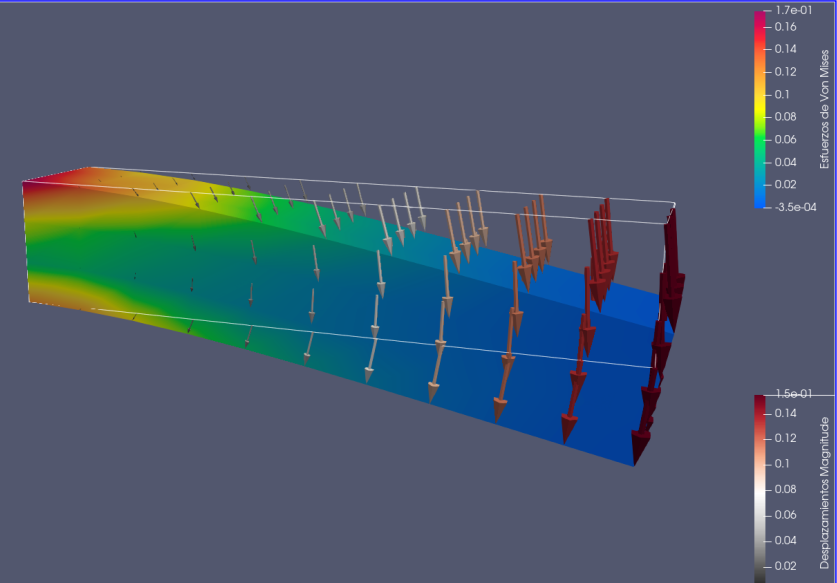

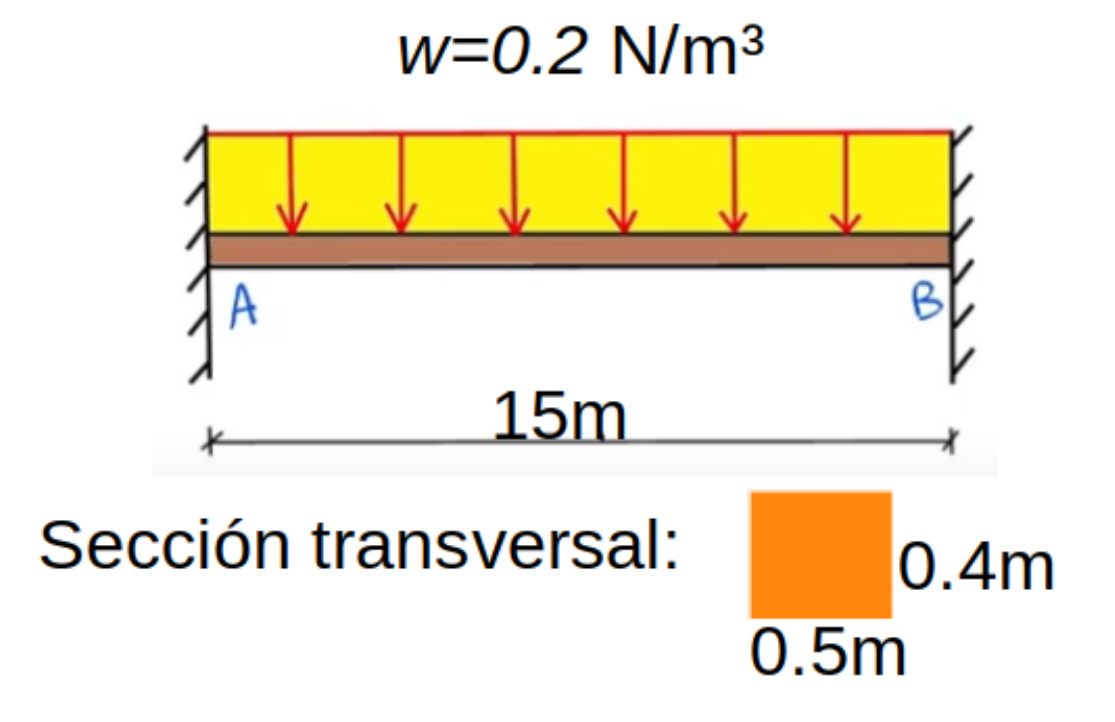

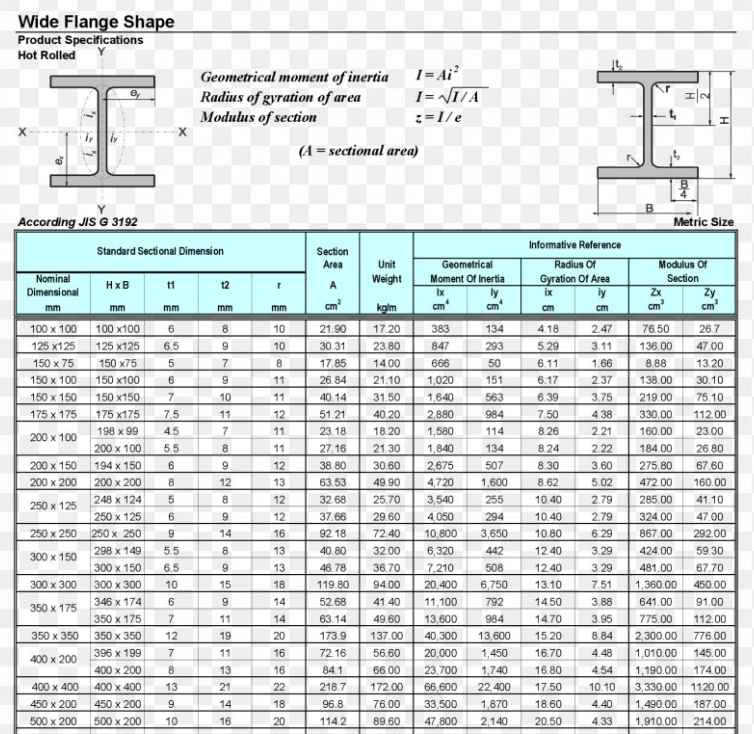

In [2]:
import openseespy.opensees as ops
import opsvis as opsv
import matplotlib.pyplot as plt

In [3]:
ops.wipe()

ops.model('basic', '-ndm', 3, '-ndf', 6)
b = 0.5
h = 0.4 

A = 0.2
A, Iz, Iy, J = 0.04, 0.0010667, 0.0002667, 0.01172
E = 25.0e6
G = 9615384.6

# detalles del material
E = 25e6
G = 97e5

# detalles de la viga
Lx = 1

<Axes3D: xlabel='X', ylabel='Y', zlabel='Z'>

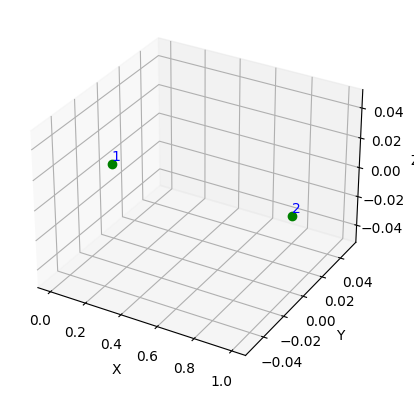

In [4]:
ops.node(1, 0, 0, 0)
ops.node(2, Lx, 0, 0)

ops.fix(1,1,1,1,1,1,1)
# ops.fix(2,1,1,1,1,1,1)

lmass = 200.
ops.mass(1, lmass, lmass, lmass, 0.001, 0.001, 0.001)

opsv.plot_model()

<Axes3D: xlabel='X', ylabel='Y', zlabel='Z'>

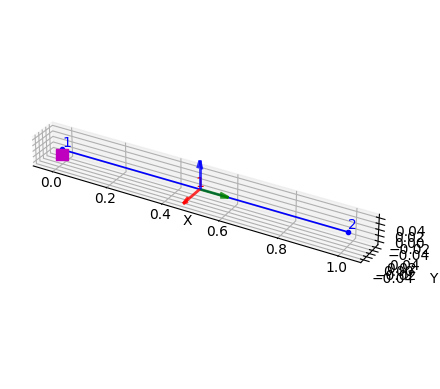

In [5]:
coordTransf = 'Linear'
tag = 1
ops.geomTransf(coordTransf, tag, 0, -1, 0)
# xz vector
ops.element('elasticBeamColumn', 1, 1, 2, A, E, G, J, Iy, Iz, tag)

opsv.plot_model()

In [6]:
# Carga distribuída w = (x,y)
# wx = 0.
# wy = -0.2e+3
# Carga_dist = {1: ['-beamUniform', wy, wx, 0]}

P = -2.e2


# Defino las opciones para el modelo
ops.timeSeries('Constant', 1)
ops.pattern('Plain', 1, 1)

ops.load(2,P,P,P,0.,0.,0.)

# Agregamos la carga distribuida
# for c in Carga_dist:
    # ops.eleLoad('-ele', c, '-type', Carga_dist[c][0], Carga_dist[c][1], Carga_dist[c][2])

<Axes3D: xlabel='X', ylabel='Y', zlabel='Z'>

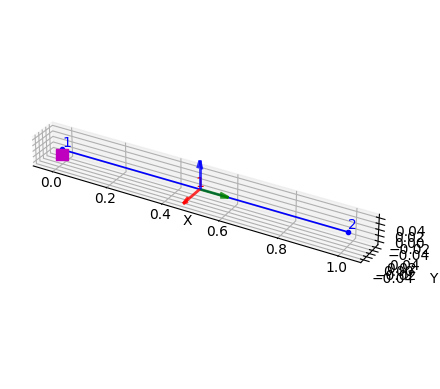

In [7]:
# Análisis estructural

ops.constraints('Transformation')
ops.numberer('RCM')
ops.system('BandGeneral')
ops.test('NormDispIncr', 1.0e-6, 6, 2)
ops.algorithm('Linear')
ops.integrator('LoadControl', 1)
ops.analysis('Static')
ops.analyze(1)

opsv.plot_model()

In [ ]:
formas = {1: ['I', [b,h, b/10, h/7]]}

opsv.plot_extruded_shapes_3d(formas, fig_wi_he=(60,40))

In [ ]:
formas = {1: ['rect', [b,h]]}
# formas = {1: ['I', [b,h, b/10, h/7]]}

opsv.plot_extruded_shapes_3d(formas, fig_wi_he=(60,40))

Text(0.5, 0.92, 'Axial force N')

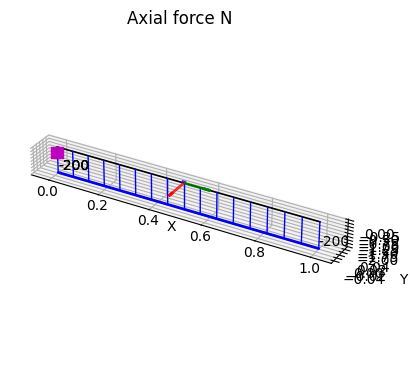

In [9]:
sfacN = 1.e-2
sfacVy = 5.e-2
sfacVz = 1.e-2
sfacMy = 1.e-2
sfacMz = 1.e-2
sfacT = 1.e-2

# plt.figure()
opsv.section_force_diagram_3d('N', sfacN)
plt.title('Axial force N')

Text(0.5, 0.92, 'Torsional moment T')

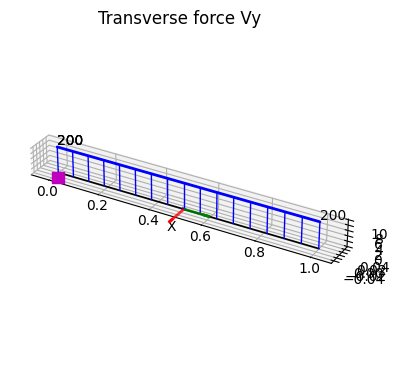

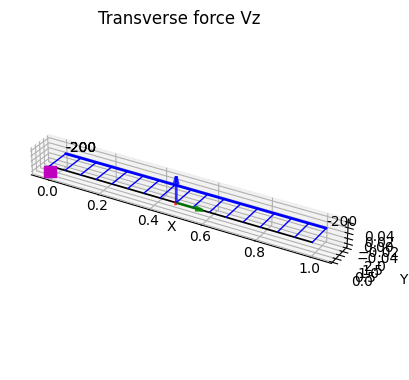

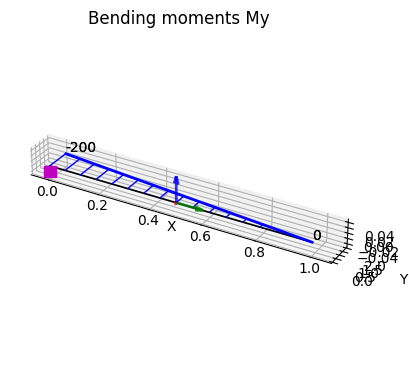

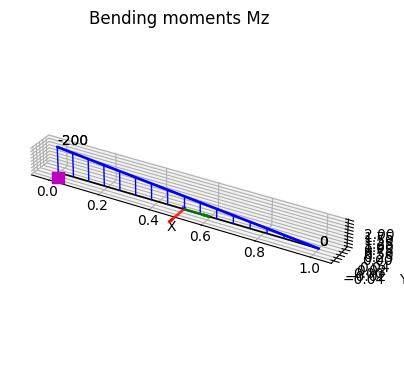

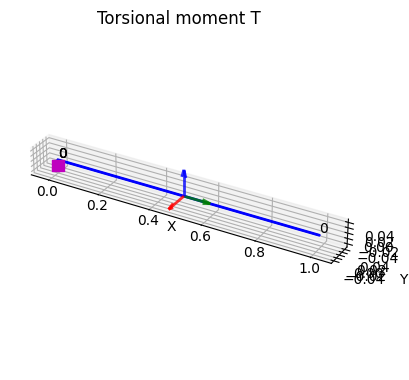

In [10]:
opsv.section_force_diagram_3d('Vy', sfacVy)
plt.title('Transverse force Vy')

opsv.section_force_diagram_3d('Vz', sfacVz)
plt.title('Transverse force Vz')

opsv.section_force_diagram_3d('My', sfacMy)
plt.title('Bending moments My')

opsv.section_force_diagram_3d('Mz', sfacMz)
plt.title('Bending moments Mz')

opsv.section_force_diagram_3d('T', sfacT)
plt.title('Torsional moment T')

Text(0.5, 0.92, '3d viga')

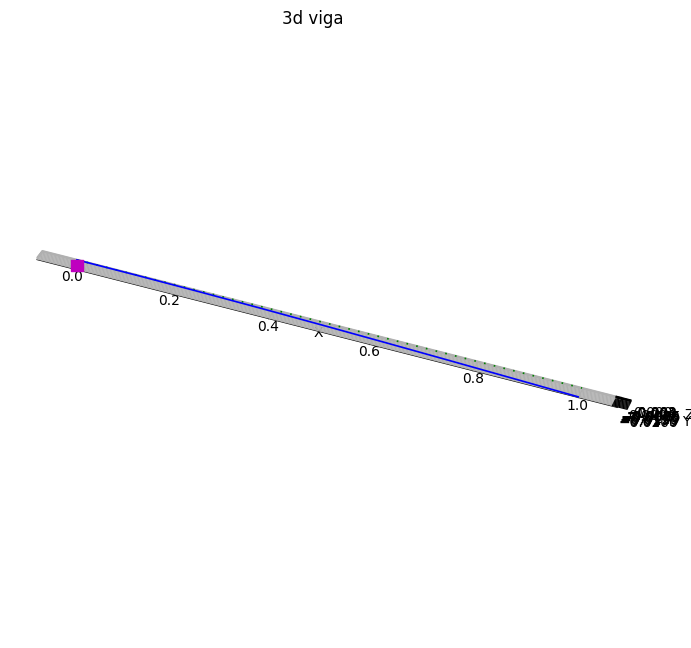

In [8]:
sfac = 2.0e0
fig_wi_he = 30., 20.

nep = 9
opsv.plot_defo(sfac, nep, az_el=(-68., 39.),
fig_wi_he=fig_wi_he, endDispFlag=0)
plt.title('3d viga')